# YOLOv3 in using cv2.dnn.readNetFrom()

---
### Imports and Helper-functions

In [31]:
import os
from os import listdir
from os.path import isfile, join
import random

import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
def imshow(img, title=None, size=10, axis=False, color_space="BGR"):
    aspect_ratio = img.shape[0] / img.shape[1]
    plt.figure(figsize=(size * aspect_ratio, size))
    if color_space.lower() == "bgr":
        rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    elif color_space.lower() == "rgb":
        rgb_img = img
    else:
        rgb_img = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)
    plt.imshow(rgb_img)
    if type(title) == str:
        plt.title(title)
    if axis == False:
        plt.axis('off')
    plt.show()

In [27]:
def get_random_img_path(search_path='../../res/img', skip=["flickr"]):
    """
    This function searches for common image files in all subdirectories
    and return a random image path of them.
    """
    image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.ico']
    image_paths = []

    # Walk through all subdirectories
    for root, dirs, files in os.walk(search_path):
        for file_name in files:
            # Check if the file is an image
            if any(file_name.lower().endswith(ext) for ext in image_extensions):
                # Get the full file path
                full_path = os.path.join(root, file_name).replace("\\", "/")
                if not any(i in full_path for i in skip):
                    image_paths.append(full_path)

    return random.choice(image_paths)

# get an image
IMG_PATH = get_random_img_path(skip=["flickr", "weather", "gem", "Cheetahs", "Lions", "chinese_art", "course_img"])
IMG_PATH   

'../../res/img/self/DSC00273.JPG'

---
### Loading data

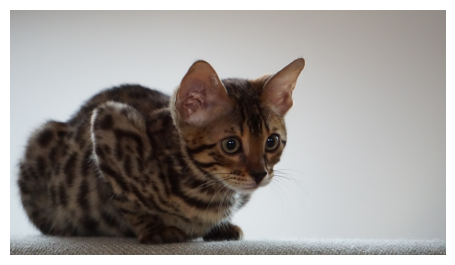

(1080, 1920, 3)

In [30]:
image = cv2.imread(IMG_PATH)
imshow(image)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

image.shape

---
### Topic 1

### YOLO Object Detection

![](https://opencv-tutorial.readthedocs.io/en/latest/_images/yolo1_net.png)

**Steps Invovled**

1. Use Pretrained YOLOV3 weights (237MB)- https://pjreddie.com/media/files/yolov3.weights
2. Create our blob object which is our loaded model
3. Set the backend that runs the model

In [33]:
# Load the COCO class labels our YOLO model was trained on
labelsPath = "../../res/YOLO/coco.names"
LABELS = open(labelsPath).read().strip().split("\n")
 
# We now need to initialize a list of colors to represent each possible class label
COLORS = np.random.randint(0, 255, size=(len(LABELS), 3), dtype="uint8")

print("Loading YOLO weights...") 

weights_path = "../../res/YOLO/yolov3.weights" 
cfg_path = "../../res/YOLO/yolov3.cfg"

# Create our blob object
net = cv2.dnn.readNetFromDarknet(cfg_path, weights_path)

# Set our backend
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
# net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

print("Our YOLO Layers")
ln = net.getLayerNames()

# There are 254 Layers
print(len(ln), ln)

Loading YOLO weights...
Our YOLO Layers
254 ('conv_0', 'bn_0', 'leaky_1', 'conv_1', 'bn_1', 'leaky_2', 'conv_2', 'bn_2', 'leaky_3', 'conv_3', 'bn_3', 'leaky_4', 'shortcut_4', 'conv_5', 'bn_5', 'leaky_6', 'conv_6', 'bn_6', 'leaky_7', 'conv_7', 'bn_7', 'leaky_8', 'shortcut_8', 'conv_9', 'bn_9', 'leaky_10', 'conv_10', 'bn_10', 'leaky_11', 'shortcut_11', 'conv_12', 'bn_12', 'leaky_13', 'conv_13', 'bn_13', 'leaky_14', 'conv_14', 'bn_14', 'leaky_15', 'shortcut_15', 'conv_16', 'bn_16', 'leaky_17', 'conv_17', 'bn_17', 'leaky_18', 'shortcut_18', 'conv_19', 'bn_19', 'leaky_20', 'conv_20', 'bn_20', 'leaky_21', 'shortcut_21', 'conv_22', 'bn_22', 'leaky_23', 'conv_23', 'bn_23', 'leaky_24', 'shortcut_24', 'conv_25', 'bn_25', 'leaky_26', 'conv_26', 'bn_26', 'leaky_27', 'shortcut_27', 'conv_28', 'bn_28', 'leaky_29', 'conv_29', 'bn_29', 'leaky_30', 'shortcut_30', 'conv_31', 'bn_31', 'leaky_32', 'conv_32', 'bn_32', 'leaky_33', 'shortcut_33', 'conv_34', 'bn_34', 'leaky_35', 'conv_35', 'bn_35', 'leaky_36'

The input to the network is a called blob object. 

The function ```cv.dnn.blobFromImage(img, scale, size, mean)``` transforms the image into a blob:

```blob = cv.dnn.blobFromImage(img, 1/255.0, (416, 416), swapRB=True, crop=False)```

**It has the following parameters:**

1. the image to transform
2. the scale factor (1/255 to scale the pixel values to [0..1])
3. the size, here a 416x416 square image
4. the mean value (default=0)
5. the option swapBR=True (since OpenCV uses BGR)

**Note** A blob is a 4D numpy array object (images, channels, width, height). The image below shows the red channel of the blob. You notice the brightness of the red jacket in the background.



In [39]:
net.getUnconnectedOutLayers()[0]-1

199

Starting Detections...


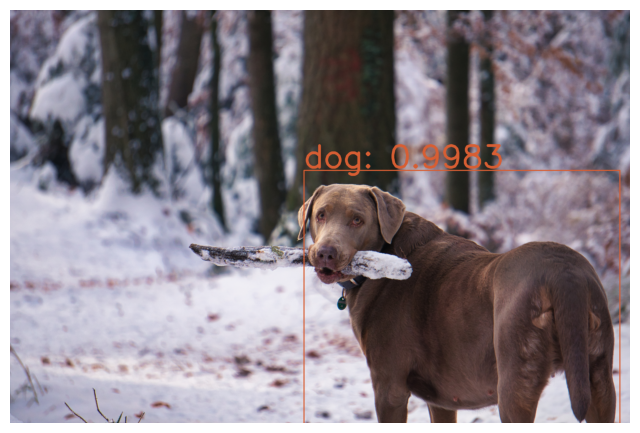

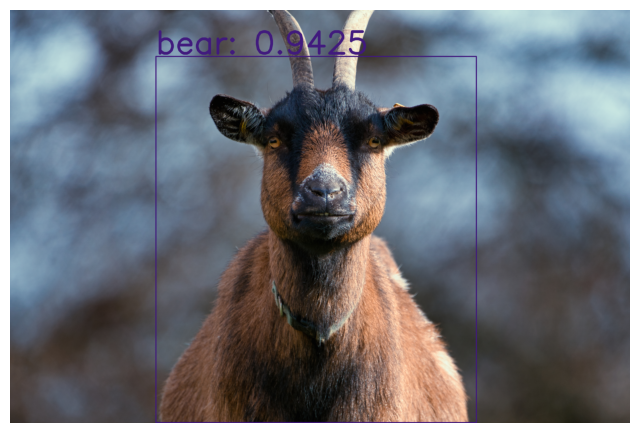

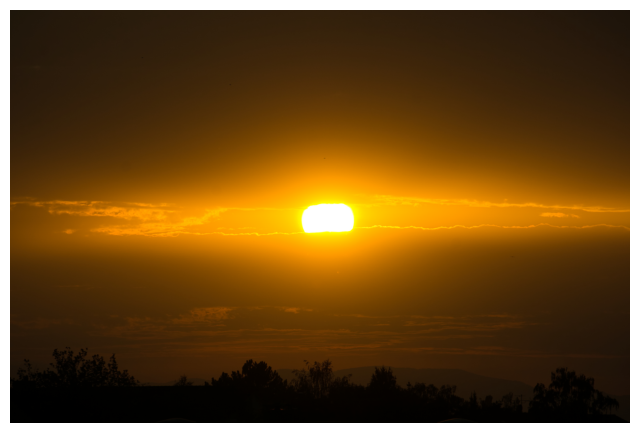

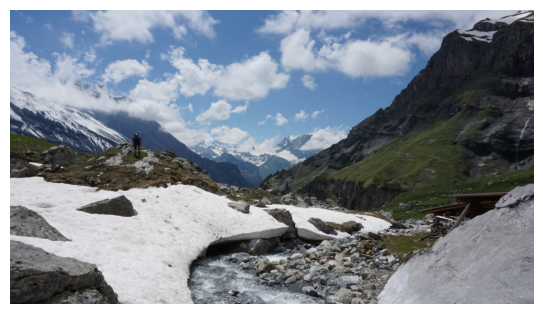

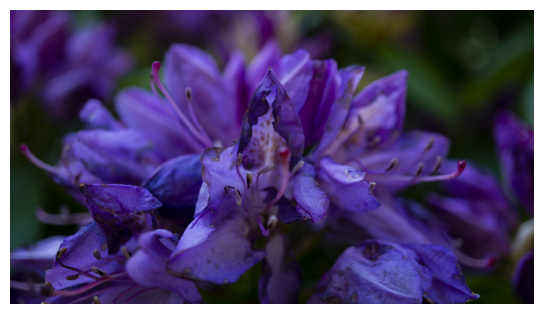

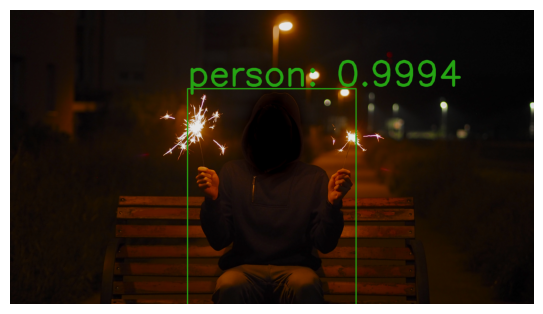

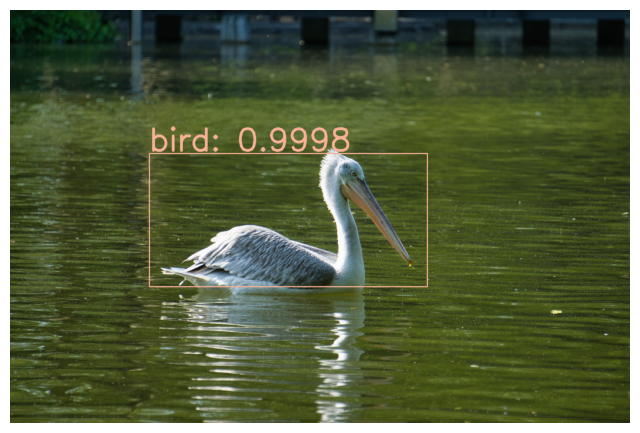

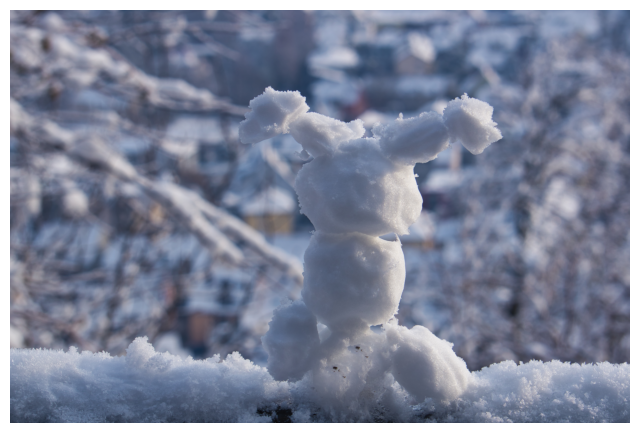

In [58]:
print("Starting Detections...")
# Get images located in ./images folder    
mypath = "../../res/img/self/"
file_names = [f for f in listdir(mypath) if isfile(join(mypath, f))]
file_names = np.random.choice(file_names, 10, replace=False)

# Loop through images run them through our classifer
for cur_file in file_names:
    # load our input image and grab its spatial dimensions
    image = cv2.imread(mypath+cur_file)
    (H, W) = image.shape[:2]
 
    # we want only the *output* layer names that we need from YOLO
    ln = net.getLayerNames()
    ln = [ln[i - 1] for i in net.getUnconnectedOutLayers()]

    # Now we contruct our blob from our input images
    blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416), swapRB=True, crop=False)
    # We set our input to our image blob
    net.setInput(blob)
    # Then we run a forward pass through the network
    layerOutputs = net.forward(ln)

    # we initialize our lists for our detected bounding boxes, confidences, and classes
    boxes = []
    confidences = []
    IDs = []

    # Loop over each of the layer outputs
    for output in layerOutputs:

        # Loop over each detection
        for detection in output:
            # Obtain class ID and probality of detection
            scores = detection[5:]
            classID = np.argmax(scores)
            confidence = scores[classID]

            # We keep only the most probably predictions
            if confidence > 0.75:
                # We scale the bounding box coordinates relative to the image
                # Note: YOLO actually returns the center (x, y) of the bounding
                # box followed by the width and height of the box
                box = detection[0:4] * np.array([W, H, W, H])
                (centerX, centerY, width, height) = box.astype("int")

                # Get the the top and left corner of the bounding box
                # Remember we alredy have the width and height
                x = int(centerX - (width / 2))
                y = int(centerY - (height / 2))

                # Append our list of bounding box coordinates, confidences and class IDs
                boxes.append([x, y, int(width), int(height)])
                confidences.append(float(confidence))
                IDs.append(classID)

    # Now we apply non-maxima suppression to reduce overlapping bounding boxes
    idxs = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.3)

    # We proceed once a detection has been found
    if len(idxs) > 0:
        # iterate over the indexes we are keeping
        for i in idxs.flatten():
            # Get the bounding box coordinates
            (x, y) = (boxes[i][0], boxes[i][1])
            (w, h) = (boxes[i][2], boxes[i][3])

            # Draw our bounding boxes and put our class label on the image
            color = [int(c) for c in COLORS[IDs[i]]]
            cv2.rectangle(image, (x, y), (x + w, y + h), color, 10)
            text = "{}: {:.4f}".format(LABELS[IDs[i]], confidences[i])
            cv2.putText(image, text, (x, y - 30), cv2.FONT_HERSHEY_SIMPLEX, 10, color, 25)

    # show the output image
    imshow(image, size = 12)

---